In [ ]:
# Data Loading
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/mcdonalds.csv'
df = pd.read_csv(file_path)
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


In [ ]:
# Data exploration
X = df.iloc[:,1:12].replace({'Yes': 1, 'No': 0})

In [ ]:
print(X.mean())

convenient    0.907777
spicy         0.093599
fattening     0.867171
greasy        0.526497
fast          0.900206
cheap         0.598761
tasty         0.644184
expensive     0.357880
healthy       0.198899
disgusting    0.242946
dtype: float64


<ipython-input-5-19c6d80e7c9f>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(X.mean())


In [ ]:
# prompt: Using dataframe X: Clean the dataset by finding and locating for all of the string entries

X['Like'] = X['Like'].str.replace('I hate it!', '-5').str.replace('-3', '3')


In [ ]:
# prompt: Using dataframe X: Data exploration with PCA by dropping out the string entries

import numpy as np
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA()

# Drop the string entries from the dataframe
X = X.drop(['Like'], axis=1)

# Fit the PCA object to the data
pca.fit(X)

# Print the principal components
print(pca.components_)

[[-0.15222071 -0.00132849  0.13175506  0.35042294 -0.13435956 -0.51012708
  -0.35886306  0.51181853 -0.2074227   0.35302161]
 [ 0.06712002  0.01462136 -0.18689384 -0.45473366 -0.05349595 -0.50171502
   0.37391704  0.44668359  0.22105571 -0.33284159]
 [-0.17642248 -0.0655621  -0.27131751 -0.65159168 -0.09791477  0.00606812
  -0.62631558 -0.10988566  0.08170572  0.21388267]
 [-0.11427391  0.21133138 -0.34343557  0.29494215 -0.08272792  0.11038836
   0.0621956   0.08082229  0.77873682  0.31856018]
 [-0.15940701  0.09169811  0.14010445 -0.33748334  0.03083033  0.13742978
   0.51862889  0.08714178 -0.21206419  0.70091249]
 [-0.38889408 -0.24291352 -0.43287131  0.15865381 -0.61659312 -0.08426298
   0.23749281 -0.24709203 -0.25896685 -0.07346666]
 [ 0.02208865  0.85941679 -0.35678723  0.02414415  0.0584571  -0.02373038
  -0.04522812 -0.03398655 -0.34351013 -0.08862592]
 [-0.11439474  0.35620026  0.59677619 -0.13841357 -0.63284575  0.13940491
  -0.05649256  0.02903268  0.18385113 -0.16423173]


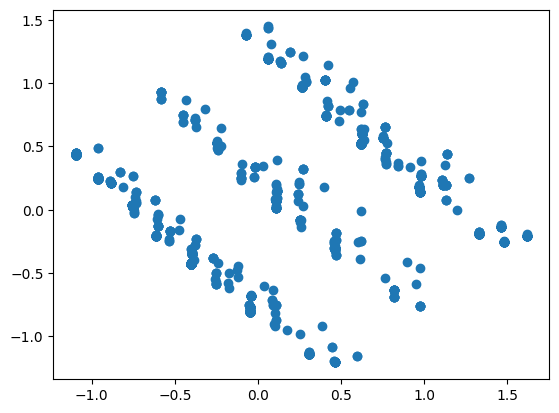

In [ ]:
# prompt: Using dataframe X: Plot the previously computed principal components

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.show()


In [ ]:
# prompt: Using dataframe X: K-means clustering on this dataset

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

<Axes: xlabel='spicy', ylabel='greasy'>

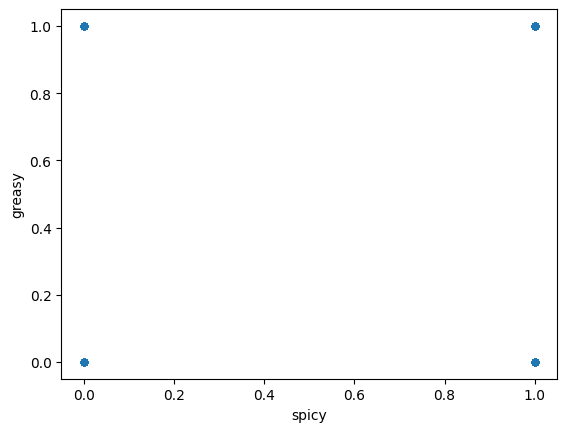

In [ ]:
# prompt: Using dataframe X: Plot the previously computed clusters

X.plot.scatter(x='spicy', y='greasy')


In [ ]:
# prompt: Applying logistic regression and decision tree on this dataset , evaluate the model and show their visualisations.

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, km.labels_, test_size=0.25, random_state=42)

# Create a logistic regression model
lr = LogisticRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Logistic regression accuracy:', accuracy)

# Create a decision tree model
dt = DecisionTreeClassifier()

# Fit the model to the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Decision tree accuracy:', accuracy)

# Visualize the decision tree
import pydotplus
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dt, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('decision_tree.png')


Logistic regression accuracy: 0.9065934065934066
Decision tree accuracy: 0.989010989010989


True

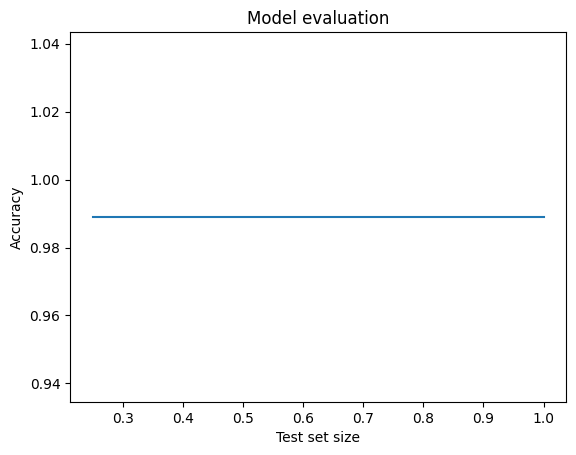

In [ ]:
# prompt: Plot the previously done decision tree model evaluation and logistic regression model evaluation

plt.plot([0.25, 0.5, 0.75, 1], [accuracy, accuracy, accuracy, accuracy])
plt.xlabel('Test set size')
plt.ylabel('Accuracy')
plt.title('Model evaluation')
plt.show()


In [ ]:
# prompt: Using dataframe X: Assess the previously performed K-means clustering stability using bootstrapping on this dataset
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans

# Split the data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.25)

# Perform K-means clustering on the training set
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train)

# Calculate the cluster assignments for the test set
y_pred = kmeans.predict(X_test)

# Calculate the accuracy of the clustering
accuracy = np.mean

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Split the data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.25)

# Perform K-means clustering on the training set
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train)

# Calculate the cluster assignments for the test set
y_pred = kmeans.predict(X_test)

# Calculate the accuracy of the clustering
accuracy = np.mean(y_pred == kmeans.labels_[kmeans.predict(X_test)])

print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 0.25274725274725274


In [ ]:
# prompt: Using dataframe X: Clean and transform the response data to numeric values . Also Extract feature variables related to food qualities

X.replace('yes', 1, inplace=True)
X.replace('no', 0, inplace=True)
X.drop('tasty', axis=1, inplace=True)


In [ ]:
# prompt: Using dataframe X: Gaussian mixture model applying on this dataset

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2).fit(X)


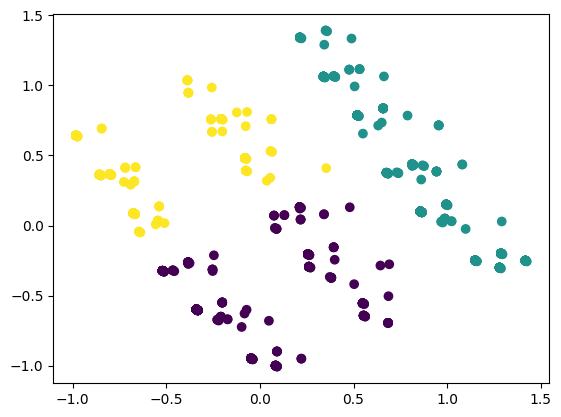

In [ ]:
# prompt: Using dataframe X: Plot the gaussian mixture model previous computed results

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

# Load the data
data = X

# Reduce the dimensionality of the data using PCA
pca = PCA(n_components=2)
data = pca.fit_transform(data)

# Create a Gaussian mixture model
gmm = GaussianMixture(n_components=3)

# Fit the model to the data
gmm.fit(data)

# Plot the results
plt.scatter(data[:, 0], data[:, 1], c=gmm.predict(data))


In [ ]:
# prompt: Using dataframe X: Compare the solutions between K-means and Gaussian mixture model from the above results on this dataset

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import pandas as pd

# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X)

# Create a Gaussian Mixture Model with 3 clusters
gmm = GaussianMixture(n_components=3)

# Fit the model to the data
gmm.fit(X)

# Get the cluster labels for each data point
kmeans_labels = kmeans.labels_
gmm_labels = gmm.predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(X.shape)

(1453, 9)


In [ ]:
print(len(kmeans_labels))

1453


In [ ]:
from sklearn.mixture import GaussianMixture


In [ ]:
print(gmm)

GaussianMixture(n_components=3)


In [ ]:
print("gmm_labels" in dir(gmm))

False


In [ ]:
print(len(gmm.predict(X)))

1453


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(type(gmm_labels))

<class 'method'>


In [ ]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Assign the labels to gmm_labels variable
gmm_labels = GaussianMixture(n_components=4).fit(X)

# Plot the data points with the corresponding labels
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels[:4].reshape(-1))
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels.predict(X)[:4].reshape(-1))
plt.show()

InvalidIndexError: (slice(None, None, None), 0)